In [1]:
import praw
import pprint
import time
from praw.models import MoreComments
from datetime import datetime
from nltk.corpus import stopwords
stop_common=set(stopwords.words('english'))
from wordcloud import WordCloud
import urllib.request,json
import matplotlib.pyplot as plt
import pickle
import csv
import re

**We want to crawl all the posts between 2020-06-06 to 2020-01-01**

In [12]:
def get_time(sub):
    return datetime.utcfromtimestamp(int(sub)).strftime('%Y-%m-%d')

#COVID RELATED: TRUE
def filter_condition(submission):
    key_words = ["covid", "pandemic", "corona", "virus", "cesb", "cerb", "wuhan", "pneumonia"]
    
    for key in key_words:
        if(key in submission["title"].lower()):
            return True
    
    return False

#CLEAN THE COMMON WORDS
def clean_data(data, stop_common=stop_common):
    stop_common = set.union(stop_common, {'summer', 'student', 'course', 'courses', 'uoft','utm',
                                          'utsc','anyone', 'students'})
    data = data.lower() #transfer to lower case
    data = data.replace("'s", "") #remove 's
    data = re.sub(r'[^\w]', ' ', data) #remove all symbol
    data = filter(lambda w: not w in stop_common,data.split(" "))#split the sentence and remove the stop words
    data = list(filter(("").__ne__, data)) #remove blank element
    
    return data

#GET THE POSTS' TITLE FOR FURTHER ANALYSIS
def order_title(data):
    split_data_list_COVID = []
    split_data_list_ALL = []
    index = 0
    for i in data:
        for post in i:
            if(filter_condition(post)):
                index +=1
                split_data_list_COVID += clean_data(post["title"])
            split_data_list_ALL += clean_data(post["title"])
    print(index)
    return (split_data_list_COVID, split_data_list_ALL)

def save_csv(dic, path):
    with open(path, 'w') as f:
        for key in dic.keys():
            f.write("%s,%s\n"%(key,dic[key]))


In [3]:
def reddit_looper(start, end, sub_reddit, size):
    #START THE LOOP
    index = 1
    data_container = []
    date_lower = end - size
    date_upper = end
    url_str = "https://api.pushshift.io/reddit/submission/search/"
    
    while(date_lower > start):
        if(index % 9 == 0):
            print("Too many request, sleeping")
            time.sleep(60)
            
        print("Processing posts from {} from {} to {}".format(sub_reddit, get_time(date_lower), get_time(date_upper)))
        
        built_url = url_str + "?after=" + str(date_lower) + "&before=" + str(date_upper) + "&sort_type=score&sort=desc&subreddit=" + sub_reddit
        with urllib.request.urlopen(built_url) as url:
            data = json.loads(url.read())
            data_container += data["data"]
        
        date_lower -= size
        date_upper -= size
        index += 1
    
    return data_container

In [4]:
#date from 2020-01-01 to 2020-06-01
#DOWNLOAD THE DATA FROM REDDIT AND STORE THROUGH PICKLE
#UTSG_list = reddit_looper(1577836800, 1591401600, "UofT", 120000)
#UTSC_list = reddit_looper(1577836800, 1591401600, "UTSC", 120000)
#UTM_list = reddit_looper(1577836800, 1591401600, "UTM", 120000)

#date from 2019-01-01 to 2019-06-01
#DOWNLOAD THE DATA FROM REDDIT AND STORE THROUGH PICKLE
#UTSG_list_19 = reddit_looper(1546300800, 1559779200, "UofT", 120000)
#time.sleep(60)
#UTSC_list_19 = reddit_looper(1546300800, 1559779200, "UTSC", 120000)
#time.sleep(60)
#UTM_list_19 = reddit_looper(1546300800, 1559779200, "UTM", 120000)


'''
with open('UTSG_0106.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(UTSG_list, filehandle)

with open('UTM_0106.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(UTM_list, filehandle)
    
with open('UTSC_0106.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(UTSC_list, filehandle)
'''


"\nwith open('UTSG_0106.data', 'wb') as filehandle:\n    # store the data as binary data stream\n    pickle.dump(UTSG_list, filehandle)\n\nwith open('UTM_0106.data', 'wb') as filehandle:\n    # store the data as binary data stream\n    pickle.dump(UTM_list, filehandle)\n    \nwith open('UTSC_0106.data', 'wb') as filehandle:\n    # store the data as binary data stream\n    pickle.dump(UTSC_list, filehandle)\n"

In [4]:
#READ ALL THE POSTS DATA TO PYTHON OBJECT
with open('UTSG_19.data', 'rb') as filehandle:
    # store the data as binary data stream
    UTSG_list_19 = pickle.load(filehandle)

with open('UTM_19.data', 'rb') as filehandle:
    # store the data as binary data stream
    UTM_list_19 = pickle.load(filehandle)
    
with open('UTSC_19.data', 'rb') as filehandle:
    # store the data as binary data stream
    UTSC_list_19 = pickle.load(filehandle)

with open('UTSG_0106.data', 'rb') as filehandle:
    # store the data as binary data stream
    UTSG_list_20 = pickle.load(filehandle)

with open('UTM_0106.data', 'rb') as filehandle:
    # store the data as binary data stream
    UTM_list_20 = pickle.load(filehandle)
    
with open('UTSC_0106.data', 'rb') as filehandle:
    # store the data as binary data stream
    UTSC_list_20 = pickle.load(filehandle)

In [9]:
(split_data_list_COVID, split_data_list_ALL) = order_title([UTSG_list_20, UTSC_list_20, UTM_list_20])
(split_data_list_COVID_19, split_data_list_ALL_19) = order_title([UTSG_list_19, UTSC_list_19, UTM_list_19])
frquency_dict_COVID = {i:split_data_list_COVID.count(i) for i in set(split_data_list_COVID)}
frquency_dict_ALL = {i:split_data_list_ALL.count(i) for i in set(split_data_list_ALL)}

153
0


In [7]:
print(len(UTSG_list_20+UTSC_list_20+UTM_list_20))

6882


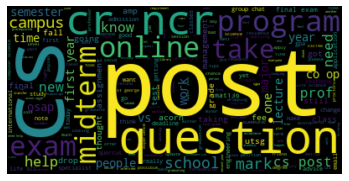

In [33]:
#all posts title in 2020
wordcloud = WordCloud().generate(",".join(split_data_list_ALL))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('post_20.png')

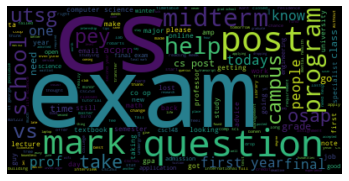

In [25]:
#all posts title in 2019
wordcloud = WordCloud().generate(",".join(split_data_list_ALL_19))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('post_19.png')

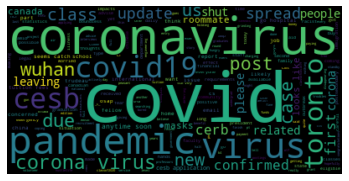

In [20]:
#COVID posts title in 2020
wordcloud = WordCloud().generate(",".join(split_data_list_COVID))
plt.imshow(wordcloud, interpolation='bilinear', background_color="white")
plt.axis("off")
plt.savefig('covid-19.png')

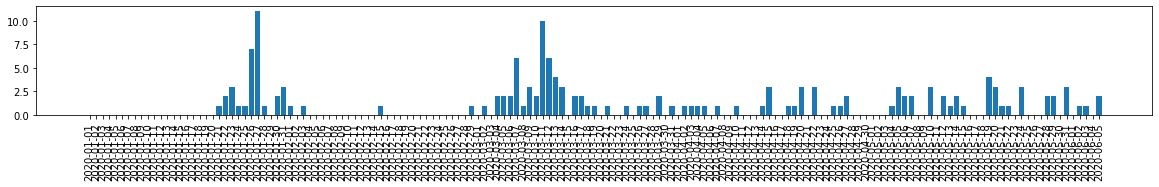

In [15]:
#DEMONSTRATE THE TIMELINE OF COVID RELATED POST
#GET ALL COVID RELATED POST:
#We have 153 COVID related posts in 6 months for three campuses
COVID_posts = []
for post in UTSG_list_20+UTSC_list_20+UTM_list_20:
    if filter_condition(post):
        COVID_posts.append(post)


#GET THEIR POST TIME AND GROUP THEM BY THEIR POST TIME BY DAYS
raw_time_list = list(range(1577836800,1591401600,86400))
timeline_COVID_posts = dict((get_time(i),0) for i in raw_time_list)
for post in COVID_posts:
    timeline_COVID_posts[get_time(post["created_utc"])] += 1

#SAVE THE DATA TO CSV FILES
save_csv(timeline_COVID_posts,"COVID_posttime.csv")
    
#PLOT THE TREND OF COVID RELATED POSTS
def plot_dict(D):
    plt.figure(figsize=(20, 2))
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()), rotation='vertical')
    plt.show()

plot_dict(timeline_COVID_posts)

In [75]:
#IMPLEMENT THE FUNCTION OF TOP RATED COVID RELATED POSTS
#CAREFUL!: Do not overrun this part, connect with reddit API, might banned is overuse
#CHECK the length of request first

'''
COVID_postid = []
for post in COVID_posts:
    COVID_postid.append(post["id"])
    
COVID_post_praw_details = []
for post_id in COVID_postid:
    COVID_post_praw_details.append(reddit.submission(post_id))
'''
COVID_id_upvote_dict = {}
for submission in COVID_post_praw_details:
    COVID_id_upvote_dict[submission.id] = submission.ups

#Sort the upvote dict
COVID_id_upvote_dict = sorted(COVID_id_upvote_dict.items(), key=lambda x: x[1], reverse=True)
print(COVID_id_upvote_dict)

[('gvbf0z', 677), ('gfbjz2', 676), ('g7z7f0', 619), ('gtrwty', 611), ('g0w307', 441), ('ewpio2', 292), ('ftle54', 146), ('gh4fwe', 121), ('ffffnc', 94), ('fskh8g', 91), ('g4vqm3', 81), ('g638x1', 71), ('g3g1m0', 71), ('fhggfq', 71), ('ety8y4', 71), ('gokveg', 69), ('g23u5m', 58), ('fvlzu7', 54), ('g1y5do', 53), ('esv53o', 41), ('fhpyd4', 36), ('es0ano', 33), ('fh1djr', 30), ('eug3d3', 28), ('etz1on', 26), ('gkfx9u', 25), ('fh59vn', 19), ('fil5bj', 18), ('gu75sw', 17), ('es6y2i', 16), ('fgeoh8', 16), ('eu3idm', 15), ('g64m5d', 15), ('gt0kpq', 14), ('fy7jjd', 14), ('ewcggj', 14), ('fghb7s', 13), ('gs4ewu', 13), ('gpm8na', 12), ('fhsocy', 12), ('feztks', 12), ('fdliyf', 11), ('fi0kwv', 11), ('fekkuu', 11), ('gi3lps', 9), ('gd242v', 9), ('fpjwh8', 9), ('gt2h0k', 8), ('gj0hhn', 8), ('fl12k7', 8), ('gmsj9f', 7), ('gjuwzd', 7), ('g4frq1', 7), ('fi8kgv', 7), ('fhnxi6', 7), ('ficbtt', 7), ('fh098l', 7), ('go2sfh', 6), ('g4w1x1', 6), ('eu0zx4', 6), ('g4w15e', 6), ('fk2342', 6), ('fenymm', 6), ('

In [94]:
#WE WANT TO CRAW ALL THE POST THE HAS KEY WORDS IN THEIR TITLE AND TEXT
'''
def get_post_id(posts):
    result = []
    for post in posts:
        result.append(post["id"])
    return result
    
all_campus_post_id = get_post_id(UTSG_list_20+UTSC_list_20+UTM_list_20)
all_campus_post_details = []
for key in all_campus_post_id:
    all_campus_post_details.append(reddit.submission(key))
'''

with open('3campus_allposts.data', 'rb') as filehandle:
    # read the data
    all_campus_post_details = pickle.load(filehandle)

**We will do analysis on specific posts later**

In [49]:
reddit = praw.Reddit(client_id = "i0UyoQyf1Zh1nQ",
                     client_secret = "I_XNgD1tJ8Z90IPbSimH5uzGKNM",
                     user_agent = "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.113 Safari/537.36")

UTSG = reddit.subreddit("UofT")
UTM = reddit.subreddit("UTSC")
UTSC = reddit.subreddit("UTM")


    
def get_title(sub):
    print(sub.title)
    print("--------------------------------------")
    print(sub.selftext)
    
def get_comments(post_id, get_more = 0):
    comment = reddit.submission(id = post_id)
    comment.comments.replace_more(limit = get_more)
    for top_level_comment in comment.comments:
        print("-------------------------------------")
        print(top_level_comment.body)
        
def get_votes(sub):
    return [sub.ups, sub.upvote_ratio]

for submission in UTSG.hot(limit=10):
    print(submission.title)
    print(submission.ups)

Admissions Megathread
10
Health & Wellness Resources
78
Academic achievement of UofT Graduates (June 2020)
163
Fixed that UTSU statement for you.
224
Although I am not having classes now, my fingers still make me type this quite often
69
I am a mess and need help and guidance but don't know who to turn to
12
I created an interactive map to show the transit travel time to UofT from the entire GTA
5
My mental health is completely shot
103
Textbooks for MSE courses
6
Academic Achievement of UC Graduates 2017 vs. 2020
3
